In [20]:
#%pip install -r requirements.txt

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
filepath_polished = "data/polished3.csv"


polished_df = pd.read_csv(filepath_polished)


In [23]:
filepath_gdp = "data/GDP.xls"

gdp_df = pd.read_excel(filepath_gdp)

gdp_df = gdp_df.drop(columns=["Indicator Name", "Indicator Code"])
gdp_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


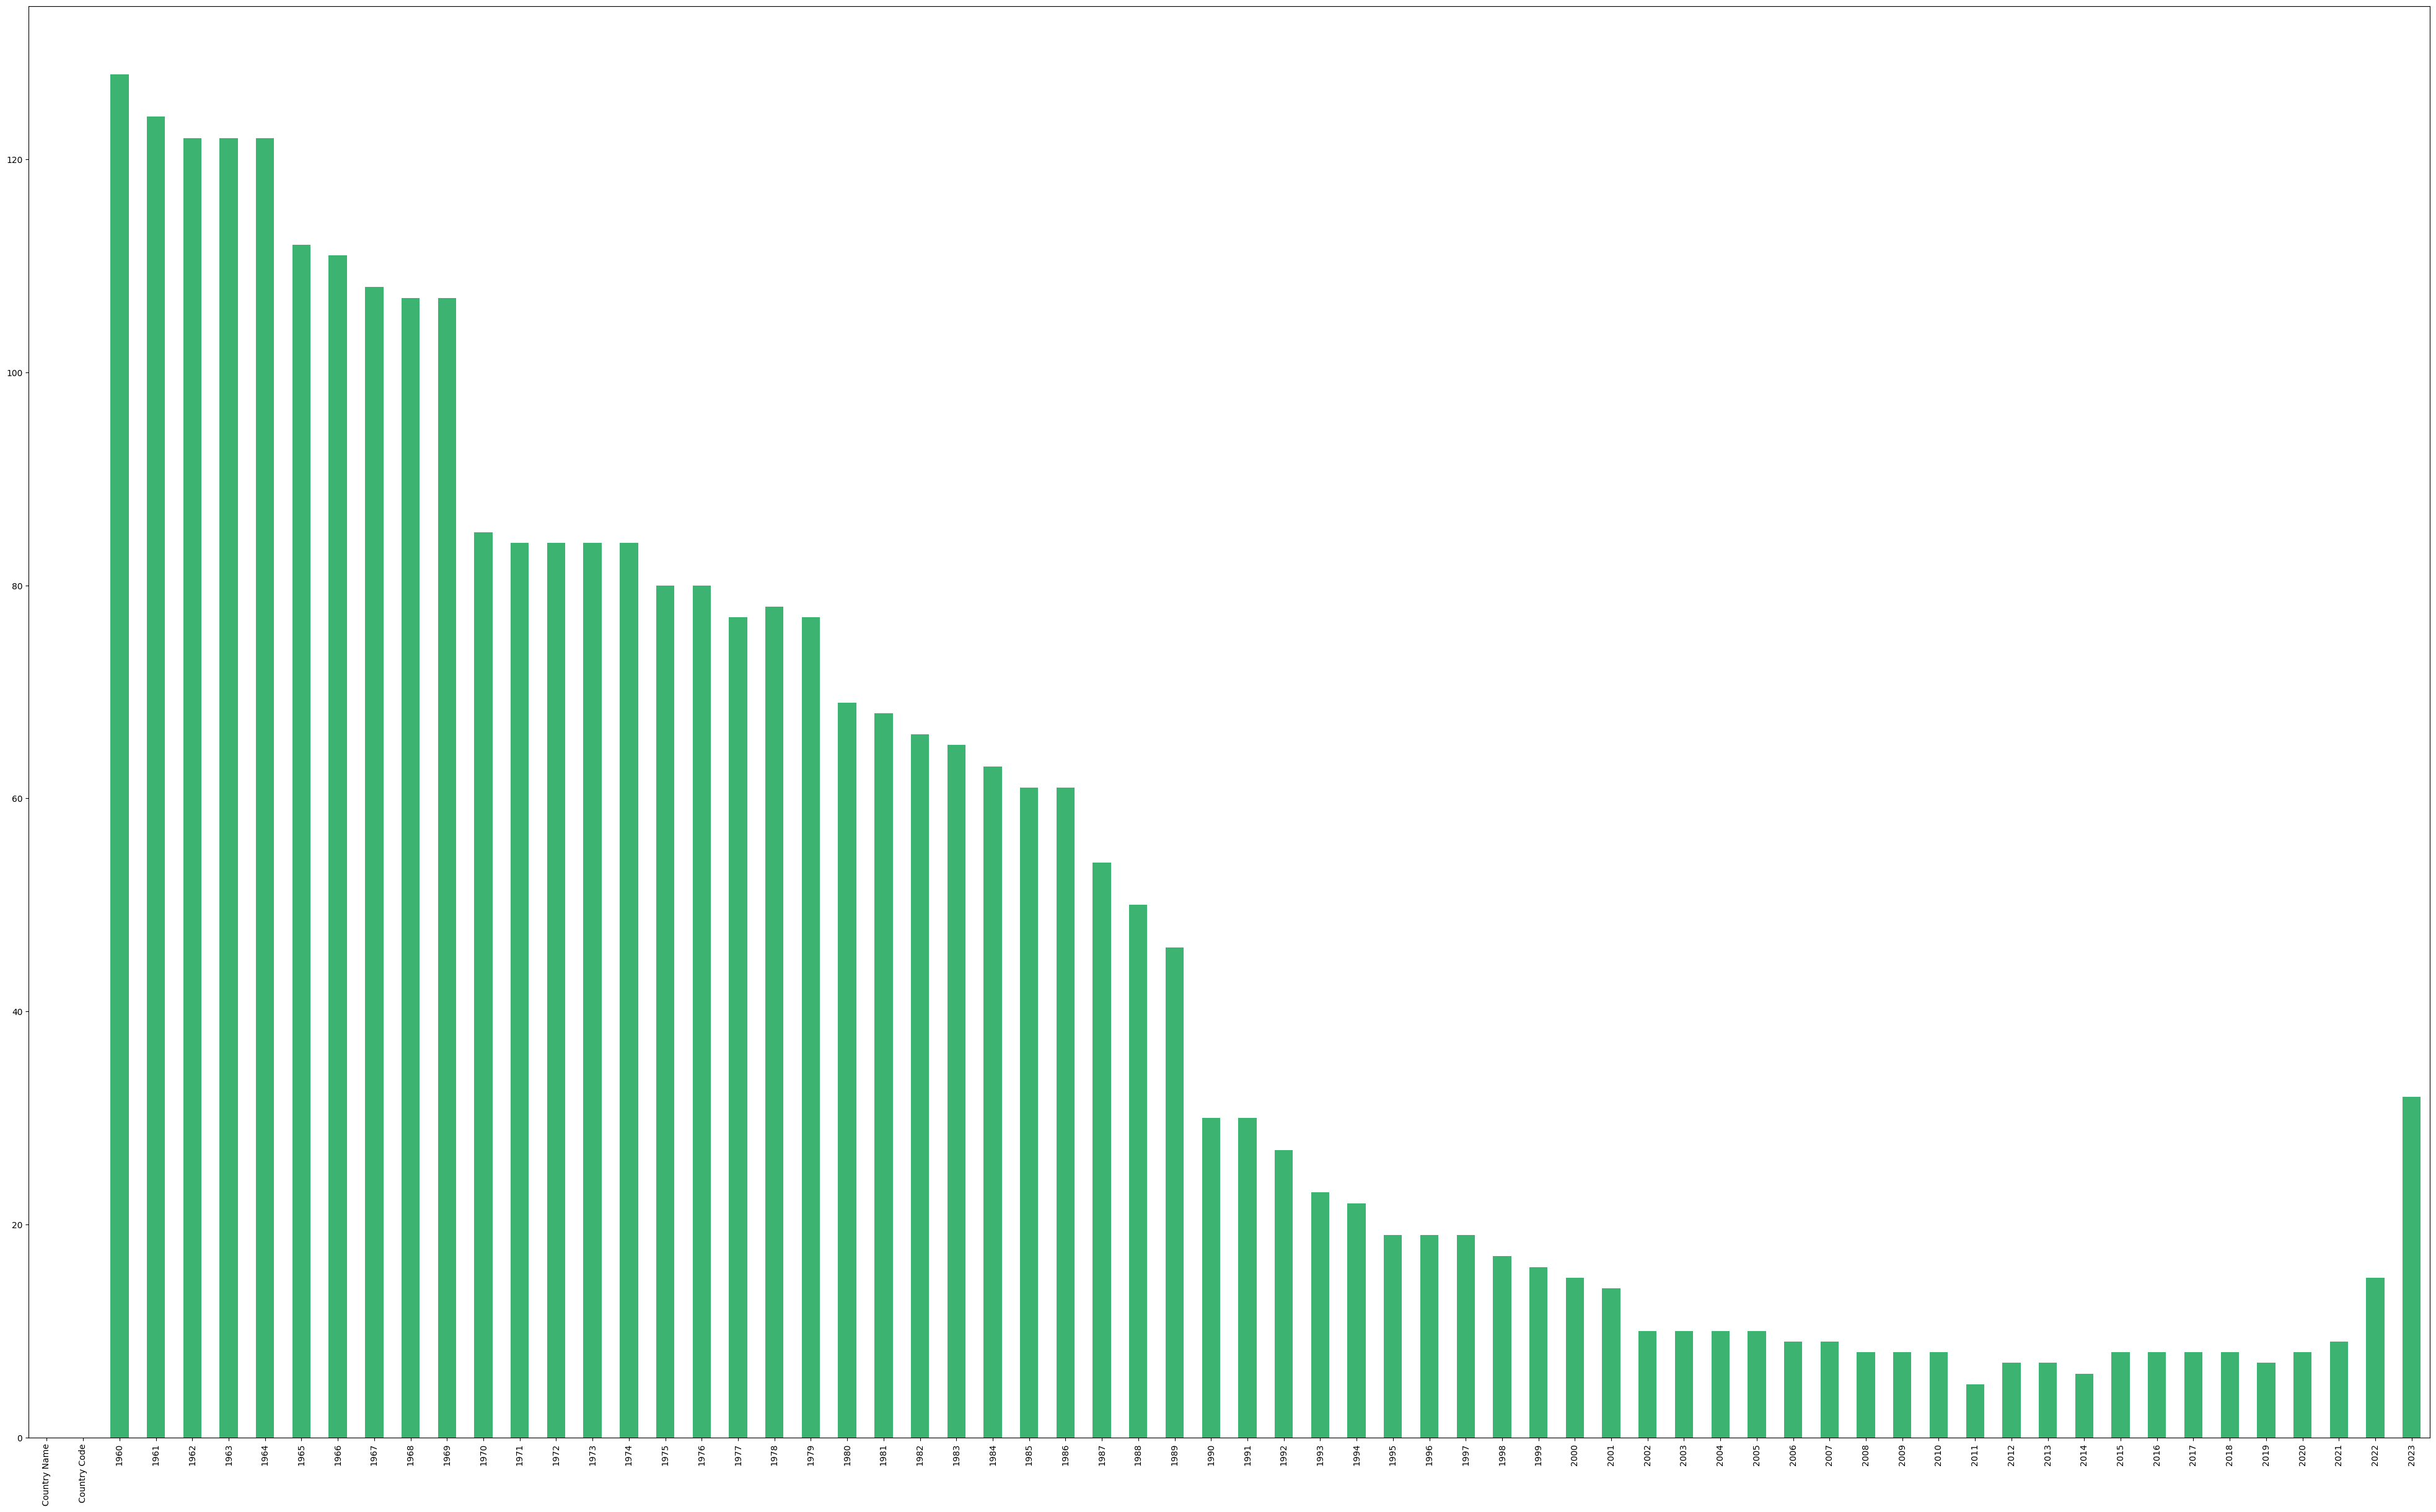

In [24]:
nulls = gdp_df.isnull().sum()

plt.figure(figsize=(50,30))
nulls.plot(kind="bar", color="mediumseagreen")
plt.show()

In [25]:
int(gdp_df.shape[0] - nulls.max())

138

In [26]:
years = [str(year) for year in range(1960, 2020)]

# I want a dataset with Country Name, Country Code, Year, GDP
gdp_melted = gdp_df.melt(id_vars=["Country Name", "Country Code"], value_vars=years, var_name="Year", value_name="GDP")

gdp_melted["Year"] = gdp_melted["Year"].astype(int)
gdp_melted

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,162.342517
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,122.193931
4,Angola,AGO,1960,NaN
...,...,...,...,...
15955,Kosovo,XKX,2019,4416.029253
15956,"Yemen, Rep.",YEM,2019,693.816508
15957,South Africa,ZAF,2019,6702.526617
15958,Zambia,ZMB,2019,1268.120941


In [27]:
taipei_gdp = [
    (1980, 3446.2),
    (1981, 3967.2),
    (1982, 4338.3),
    (1983, 4843.1),
    (1984, 5441.4),
    (1985, 5808.8),
    (1986, 6541.8),
    (1987, 7475.6),
    (1988, 8264.1),
    (1989, 9243.6),
    (1990, 9999.4),
    (1991, 11091.9),
    (1992, 12171.2),
    (1993, 13186.4),
    (1994, 14353.8),
    (1995, 15475.9),
    (1996, 16602.1),
    (1997, 17731.3),
    (1998, 18526.5),
    (1999, 19903.7),
    (2000, 21460.9),
    (2001, 21512.3),
    (2002, 22927.3),
    (2003, 24277.2),
    (2004, 26562.5),
    (2005, 28767.3),
    (2006, 31220.7),
    (2007, 34138.8),
    (2008, 34951.8),
    (2009, 34484.6),
    (2010, 38404.3),
    (2011, 40532.6),
    (2012, 41741.3),
    (2013, 43435.5),
    (2014, 45494.3),
    (2015, 46911.0),
    (2016, 47272.3),
    (2017, 48500.8),
    (2018, 51005.0),
    (2019, 53476.0),
    (2020, 56037.8)
]

taipei_gdp.extend([(year, taipei_gdp[0][0]) for year in range(1960, 1980)])

taipei_gdp_df = pd.DataFrame(taipei_gdp, columns=["Year", "GDP"])
# add Country Name as Chinese Taipei and Country Code as TPE
taipei_gdp_df["Country Name"] = "Chinese Taipei"
taipei_gdp_df["Country Code"] = "TPE"

display(taipei_gdp_df)
gdp_melted = pd.concat([gdp_melted, taipei_gdp_df], ignore_index=True)
display(gdp_melted.tail())

,Year,GDP,Country Name,Country Code
0,1980,3446.2,Chinese Taipei,TPE
1,1981,3967.2,Chinese Taipei,TPE
2,1982,4338.3,Chinese Taipei,TPE
3,1983,4843.1,Chinese Taipei,TPE
4,1984,5441.4,Chinese Taipei,TPE
...,...,...,...,...
56,1975,1980.0,Chinese Taipei,TPE
57,1976,1980.0,Chinese Taipei,TPE
58,1977,1980.0,Chinese Taipei,TPE
59,1978,1980.0,Chinese Taipei,TPE


,Country Name,Country Code,Year,GDP
16016,Chinese Taipei,TPE,1975,1980.0
16017,Chinese Taipei,TPE,1976,1980.0
16018,Chinese Taipei,TPE,1977,1980.0
16019,Chinese Taipei,TPE,1978,1980.0
16020,Chinese Taipei,TPE,1979,1980.0


In [28]:
nulls = gdp_melted.isnull().sum()

int(gdp_melted.shape[0] - nulls.max())

13045

In [29]:
gdp_dict = {}
for country_code in gdp_melted["Country Code"].unique():
    gdp_dict[country_code] = gdp_melted[gdp_melted["Country Code"] == country_code]["GDP"].tolist()
    
gdp_min_country_non_null_by_year = {
    key: (-1,0) for key in gdp_dict.keys()
}

In [30]:
for country_code, gdp_values in gdp_dict.items():
    year = 1960
    for gdp_value in gdp_values:
        if not pd.isnull(gdp_value):
            gdp_min_country_non_null_by_year[country_code] = (gdp_value, year)
            break
        year+=1

gdp_min_country_non_null_by_year

{'ABW': (6283.001443446021, 1986),
 'AFE': (162.34251747038803, 1960),
 'AFG': (180.18836940664661, 2000),
 'AFW': (122.1939312342305, 1960),
 'AGO': (450.9800763444843, 1993),
 'ALB': (639.4847301614174, 1984),
 'AND': (3958.595724900932, 1970),
 'ARB': (251.5131177543805, 1965),
 'ARE': (2301.320102209177, 1970),
 'ARG': (3727.0480101583757, 1983),
 'ARM': (634.5673276100332, 1990),
 'ASM': (8800.728810354607, 2002),
 'ATG': (1208.6700297315267, 1977),
 'AUS': (1810.5974427860906, 1960),
 'AUT': (943.6108001031212, 1960),
 'AZE': (1238.271892748423, 1990),
 'BDI': (71.3602242458753, 1960),
 'BEL': (1290.2860721619215, 1960),
 'BEN': (90.03583131305909, 1960),
 'BFA': (69.08319533213351, 1960),
 'BGD': (84.82533719469158, 1960),
 'BGR': (2238.802957865739, 1980),
 'BHR': (1759.4633453723216, 1970),
 'BHS': (1483.0036818220738, 1960),
 'BIH': (1725.1765589978363, 1990),
 'BLR': (900.5067307984069, 1992),
 'BLZ': (307.1286289561401, 1960),
 'BMU': (1902.4020853353882, 1960),
 'BOL': (10

In [31]:
for country_code, (gdp, year) in gdp_min_country_non_null_by_year.items():
    gdp_melted.loc[(gdp_melted["Country Code"] == country_code) & (gdp_melted["Year"] < year), "GDP"] = gdp
    
# show only nans
gdp_melted[gdp_melted["GDP"].isnull()]

,Country Name,Country Code,Year,GDP
84,Gibraltar,GIB,1960,NaN
110,Not classified,INX,1960,NaN
193,"Korea, Dem. People's Rep.",PRK,1960,NaN
255,British Virgin Islands,VGB,1960,NaN
350,Gibraltar,GIB,1961,NaN
...,...,...,...,...
15804,Not classified,INX,2019,NaN
15887,"Korea, Dem. People's Rep.",PRK,2019,NaN
15910,South Sudan,SSD,2019,NaN
15948,"Venezuela, RB",VEN,2019,NaN


In [32]:
# fill with the mean of the country
gdp_melted["GDP"] = gdp_melted.groupby("Country Code")["GDP"].transform(lambda x: x.fillna(x.mean()))

gdp_melted[gdp_melted["GDP"].isnull()]

,Country Name,Country Code,Year,GDP
84,Gibraltar,GIB,1960,NaN
110,Not classified,INX,1960,NaN
193,"Korea, Dem. People's Rep.",PRK,1960,NaN
255,British Virgin Islands,VGB,1960,NaN
350,Gibraltar,GIB,1961,NaN
...,...,...,...,...
15683,British Virgin Islands,VGB,2018,NaN
15778,Gibraltar,GIB,2019,NaN
15804,Not classified,INX,2019,NaN
15887,"Korea, Dem. People's Rep.",PRK,2019,NaN


In [33]:
gdp_melted = gdp_melted[~gdp_melted["Country Code"].isin(["INX", "GIB", "VGB"])]


gdp_melted.loc[gdp_melted["Country Code"] == "PRK", "GDP"] = gdp_melted[gdp_melted["Country Code"] == "KOR"]["GDP"].values

# North korea GDP per capita 2019: 640
n_s_korea_ratio = 31902 / 640
gdp_melted.loc[gdp_melted["Country Code"] == "PRK", "GDP"] = gdp_melted[gdp_melted["Country Code"] == "PRK"]["GDP"].values / n_s_korea_ratio

gdp_df = gdp_melted

In [34]:
def rename_NOC(df1:pd.DataFrame,df2:pd.DataFrame) -> dict:
    noc_1 = df1["NOC"].unique()
    noc_2 = df2["NOC"].unique()
    
    team_1 = df1["Team"].unique()
    team_2 = df2["Team"].unique()
    
    rename = {
            "URS": "RUS",   # Soviet Union -> Russia
            "IRI": "IRN",   # Iran -> Iran
            "BRU": "BRN",   # Brunei -> Brunei
            "EUN": "EUU",   # European Union -> European Union
            "GDR": "DEU",   # East Germany -> Germany
            "FRG": "DEU",   # West Germany -> Germany
            "PLE": "PSE",   # Palestine -> Palestine
            "TCH": "CZE",   # Czechoslovakia -> Czech Republic
            "SKN": "KNA",   # Saint Kitts and Nevis -> Saint Kitts and Nevis
            "MGL": "MNG",   # Mongolia -> Mongolia
            "BIZ": "BLZ",   # Belize -> Belize
            "BER": "BMU",   # Bermuda -> Bermuda
            "SCG": "SRB",   # Serbia and Montenegro -> Serbia
            "YAR": "YEM",   # Yemen Arab Republic -> Yemen
            "GUA": "GTM",   # Guatemala -> Guatemala
            "LAT": "LVA",   # Latvia -> Latvia
            "MAD": "MDG",   # Madagascar -> Madagascar
            "CHA": "TCD",   # Chad -> Chad
            "GBS": "GNB",   # Guinea-Bissau -> Guinea-Bissau
            "ISV": "VIR",   # U.S. Virgin Islands -> U.S. Virgin Islands
            "ROT": "ROU",   # Romania -> Romania
            "ANT": "CUW",   # Netherlands Antilles -> Curaçao
            "ZIM": "ZWE",   # Zimbabwe -> Zimbabwe
            "MAW": "MWI",   # Malawi -> Malawi
            "ZAM": "ZMB",   # Zambia -> Zambia
            "RHO": "ZWE",   # Rhodesia -> Zimbabwe
            "GEQ": "GNQ",   # Equatorial Guinea -> Equatorial Guinea
            "SOL": "SLB",   # Solomon Islands -> Solomon Islands
            "COK": "NZL",   # Cook Islands -> New Zeland
            "ARU": "ABW",   # Aruba -> Aruba
            "BHU": "BTN",   # Bhutan -> Bhutan
            "VIE": "VNM",   # Vietnam -> Vietnam
            "UAR": "EGY",   # United Arab Republic -> Egypt
            "TGA": "TON",   # Tonga -> Tonga
            "KOS": "XKX",   # Kosovo -> Kosovo
            "LES": "LSO"    # Lesotho -> Lesotho
        }
    
    for abb_country_1, name_country_1 in zip(noc_1,team_1):
        for abb_country_2, name_country_2 in zip(noc_2,team_2):
            if abb_country_1 != abb_country_2 and name_country_1 == name_country_2:
                rename[abb_country_1] = abb_country_2
    
    return rename

In [35]:


gdp_df = gdp_df.rename(columns={"Country Code": "NOC", "Country Name": "Team"})

rename = rename_NOC(polished_df, gdp_df)

polished_df["NOC"] = polished_df["NOC"].replace(rename)

gdp_df = gdp_df.drop(columns=["Team"])
df = polished_df.merge(gdp_df, on=["Year", "NOC"], how="left")

# drop everything that is before 1960
df = df[df["Year"] >= 1960]
df

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,24.691358,366.460692
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,20.761246,6300.582180
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,23.661439,24345.914822
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,25783.450488
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,24345.914822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166422,271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal,False,26.927438,4258.160261
166423,271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal,False,24.489796,6094.017990
166424,271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,1771.594116
166425,271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,4102.364746


In [36]:
df[df["GDP"].isnull()]

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP


In [37]:
# drop first column
df = df.drop(columns=["Unnamed: 0"])
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,24.691358,366.460692
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,20.761246,6300.582180
2,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,23.661439,24345.914822
3,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,25783.450488
4,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,24345.914822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166422,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal,False,26.927438,4258.160261
166423,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal,False,24.489796,6094.017990
166424,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,1771.594116
166425,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,4102.364746


In [38]:
# save into polished3_with_gdp.csv

df.to_csv("data/polished3_with_gdp.csv", index=False)